#### What is Decision Tree ?
##### Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 
##### The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

##### Imagine a Jar of Cookies:
##### You have a jar with chocolate, vanilla, and strawberry cookies. You reach into the jar without looking.
##### If the jar has only chocolate cookies, you're certain what you'll get — no impurity.
##### If the jar has an equal mix, you're uncertain — maximum impurity.
##### This is how we measure impurity (or unpredictability) in a dataset using:

##### What is Gini Impurity ?
##### Probability that a randomly chosen item is incorrectly labeled if randomly labeled by class distribution.
##### Gini=1−∑(pi)2

##### where pi = probability of class 

##### Example:
##### Suppose:

##### 4 chocolate 🍫 (class 1)

##### 3 vanilla 🍦 (class 2)

##### 3 strawberry 🍓 (class 3)

##### Total = 10 cookies

##### 𝐺𝑖𝑛𝑖 = 1 −(0.42 + 0.32 + 0.32) (2 is square) =1− (0.16+0.09+0.09)= 0.66
##### So, Gini = 0.66 → fairly impure

##### What is Entropy / Information Gain ?
##### Measures the level of disorder or unpredictability.

##### Entropy=−∑pi log2(pi)

##### 0.4 chocolate, 0.3 vanilla, 0.3 strawberry

##### 𝐸𝑛𝑡𝑟𝑜𝑝𝑦 = −(0.4log20.4+0.3log20.3+0.3log20.3) ≈ 1.57

##### Information Gain
##### How much “purity” we gained by splitting the data.
##### Information Gain = Entropy(before split) − Weighted Entropy(after split)
##### We want to maximize Information Gain → more certainty after splitting.


##### Hyperparameter	Description
##### criterion	Measures split quality (gini, entropy) (default)
##### max_depth	Max depth of tree
##### min_samples_split	Min samples to split a node
##### min_samples_leaf	Min samples at a leaf
##### max_features	Max features to consider per split
##### max_leaf_nodes	Limit number of final leaves
##### splitter	Split strategy: best or random
##### class_weight	Handle class imbalance
##### min_weight_fraction_leaf	Min weighted samples at a leaf (used when sample weights applied)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, confusion_matrix, classification_report

In [2]:
#Working on heart rate dataset
df = pd.read_csv('heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#split training and target values
X = df.drop(columns= ["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using gini
decision_tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1)
#using entropy
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=5)

decision_tree_gini.fit(X_train,y_train)
decision_tree_entropy.fit(X_train,y_train)

#predict gini and entropy results
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)

print(f"DT using Gini Criteria Accuracy Score: {accuracy_score(y_test, y_pred_gini)*100:.2f}")
print(f"DT using Entropy Criteria Accuracy Score: {accuracy_score(y_test, y_pred_entropy)*100:.2f}")
print(f"DT using Gini Criteria Confusion Matrix: {confusion_matrix(y_test, y_pred_gini)}")
print(f"DT using Entropy Criteria Confusion Matrix: {confusion_matrix(y_test, y_pred_entropy)}")
print(f"DT using Gini Criteria Classification Report: {classification_report(y_test, y_pred_gini)}")
print(f"DT using Entropy Criteria Classification Report: {classification_report(y_test, y_pred_entropy)}")

DT using Gini Criteria Accuracy Score: 81.97
DT using Entropy Criteria Accuracy Score: 81.97
DT using Gini Criteria Confusion Matrix: [[24  5]
 [ 6 26]]
DT using Entropy Criteria Confusion Matrix: [[24  5]
 [ 6 26]]
DT using Gini Criteria Classification Report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

DT using Entropy Criteria Classification Report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


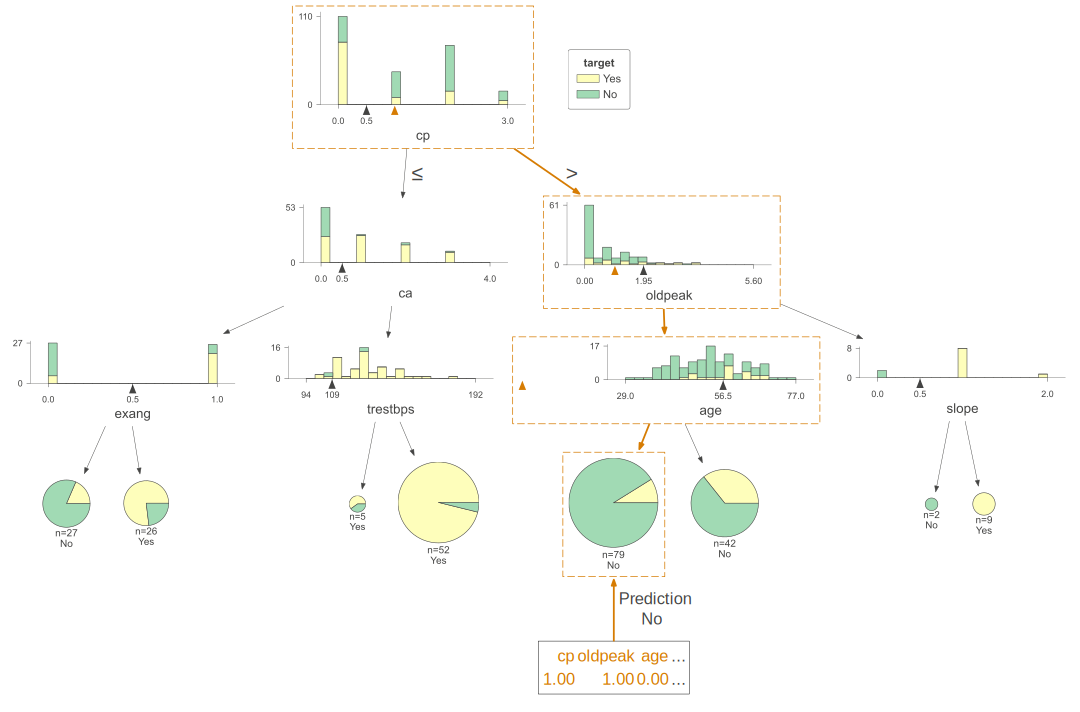

In [19]:
# !pip install dtreeviz
# !pip install graphviz
import dtreeviz

#implement dtree viz graph
viz = dtreeviz.model(decision_tree_gini, X_train, y_train, target_name='target', feature_names=X.columns, class_names=["Yes", "No"])
viz.view(scale=1.5, x=y_pred_gini)

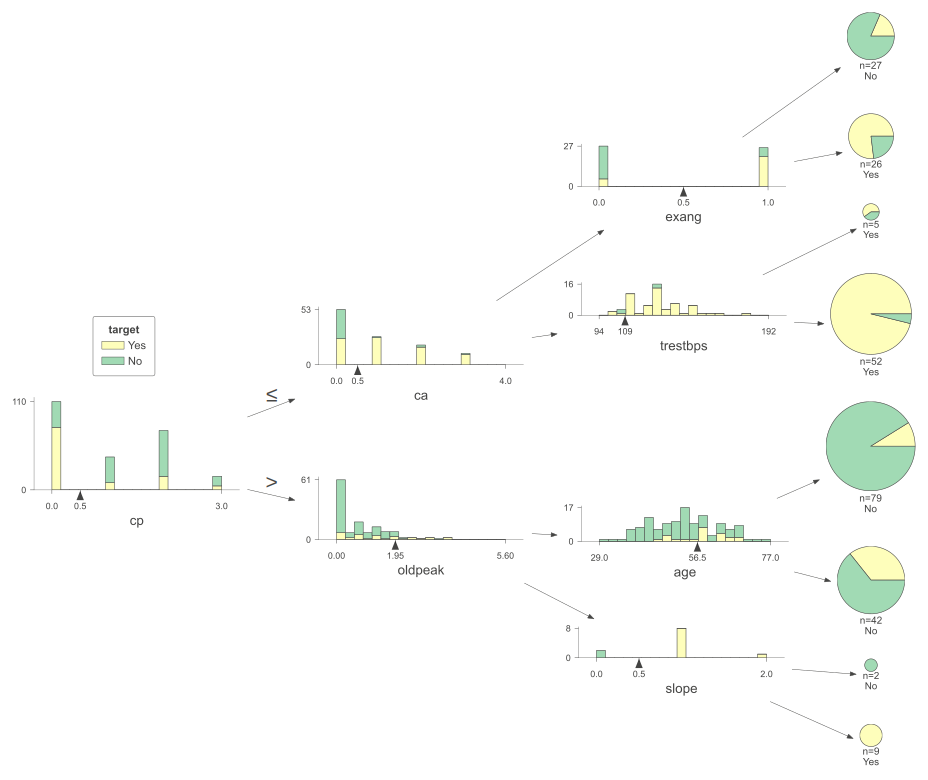

In [20]:
#show orientation with path
viz.view(scale=1.5, orientation='LR')

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


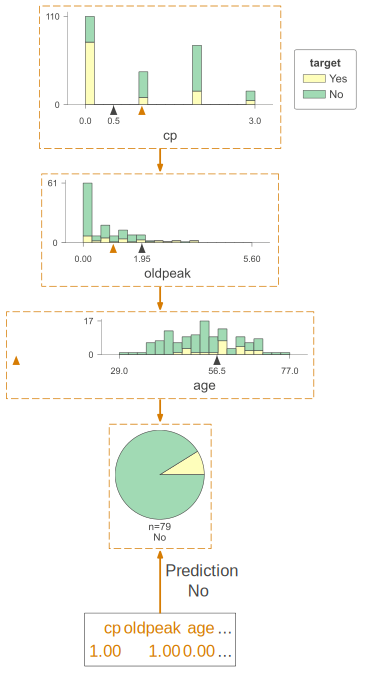

In [16]:
#show just correct path
viz = dtreeviz.model(decision_tree_gini, X_train, y_train, target_name='target', feature_names=X.columns, class_names=["Yes", "No"])
viz.view(scale=1.5,show_just_path=True, x=y_pred_gini)

In [6]:
#show imp features
# viz.instance_feature_importance(X, figsize=(3.5,2))

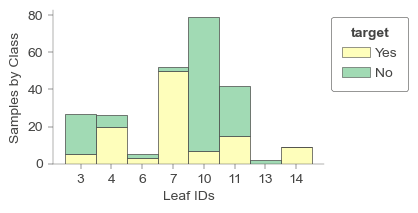

In [7]:
viz.ctree_leaf_distributions(figsize=(3.5,2))

In [9]:
#Using Decision Tree Regressor for providing regression tree
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42, criterion="absolute_error")
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=42)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


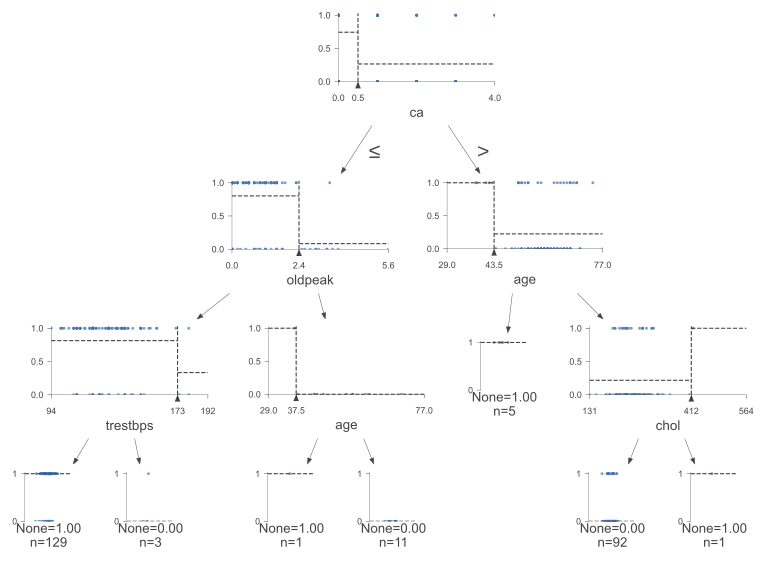

In [14]:
#create regression model graph
viz_reg_model = dtreeviz.model(model=tree_regressor, X_train=X_train, y_train=y_train,feature_names=X.columns,class_names=["Yes","No"])
viz_reg_model.view(scale=1.5)

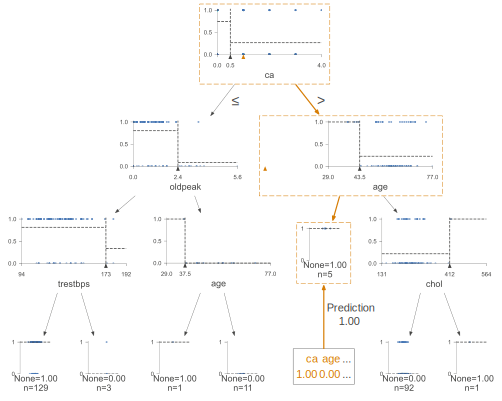

In [15]:
#prediction path
viz_reg_model.view(x = y_pred_gini)

In [26]:
# viz_reg_model.rtree_feature_space(features=['age','sex'])